In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [121]:
data = pd.read_csv('clean_data.csv', sep = ',', index_col = 0)

In [122]:
data.shape

(4610, 1012)

In [123]:
N = 100; # number of time series
T = 200  # time length
q = N/T  # ratio

In [124]:
price = data.iloc[0:T+1, 0:N]
ret = np.log(price).diff()[1:]
corr_ret = np.corrcoef(ret.T)

In [126]:
corr_ret.shape

(100, 100)

In [127]:
u, v = np.linalg.eig(corr_ret)

In [128]:
lambda_plus = (1 + np.sqrt(q))**2
N_clip = sum(u < lambda_plus)
delta = (N - sum(u * (u>lambda_plus)))/N_clip

In [129]:
## replace
U = u.copy()
U[U<lambda_plus] = delta

In [130]:
C_clip = v.T * U * v
np.fill_diagonal(C_clip, 1)

In [131]:
C_clip

array([[ 1.00000000e+00, -4.56552019e-03,  1.41046509e-02, ...,
        -5.06435202e-04, -5.47073744e-04, -1.73276526e-03],
       [-1.72281572e-02,  1.00000000e+00,  9.20999631e-03, ...,
        -7.55542491e-05,  3.69002392e-03, -1.14674525e-02],
       [ 7.43455543e-02,  1.28648154e-02,  1.00000000e+00, ...,
        -1.31851392e-04, -1.28174074e-03, -2.06606554e-03],
       ...,
       [-1.42808687e-02, -5.64600264e-04, -7.05379443e-04, ...,
         1.00000000e+00,  5.45786410e-03, -6.09124543e-03],
       [-1.54268272e-02,  2.75747361e-02, -6.85706503e-03, ...,
         5.45786410e-03,  1.00000000e+00,  1.13293987e-03],
       [-4.88619140e-02, -8.56937472e-02, -1.10530510e-02, ...,
        -6.09124543e-03,  1.13293987e-03,  1.00000000e+00]])

In [138]:
# sign of the return matrix
sign_ret = np.sign(ret)
corr_sign_ret = np.corrcoef(sign_ret.T)
sign_u, sign_v = np.linalg.eig(corr_sign_ret)

In [139]:
sum(sign_u>lambda_plus)

3

In [142]:
sign_u[sign_u>lambda_plus]

array([14.37524844,  4.31494587,  3.18917072])

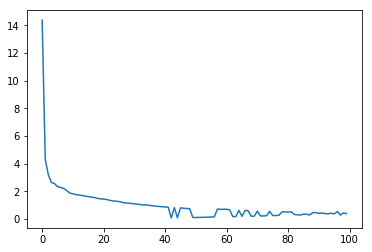

In [144]:
plt.plot(sign_u)

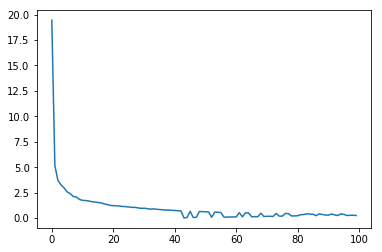

In [145]:
plt.plot(u)